In [56]:
import numpy as np
import healpy as hp
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.pyplot import figure

**Illustration of Homogeneity and Isotropy**

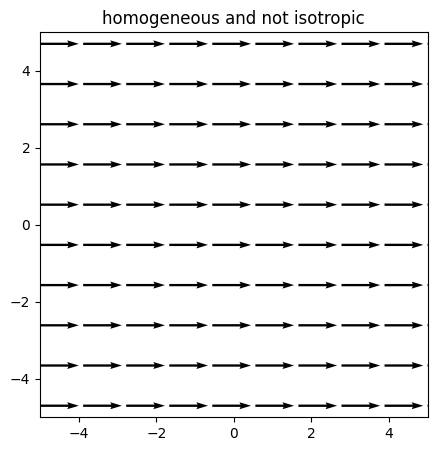

In [57]:
x = np.linspace(-5, 5, 10)
y = np.linspace(-4.7, 4.7, 10) #different range bc of aesthetic purposes
X, Y = np.meshgrid(x, y)

#direction of arrows
V = np.zeros_like(X)
U = np.ones_like(Y)

#plot
plt.figure(figsize=(5,5))
plt.quiver(X, Y, U, V, scale = 10)
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.title("homogeneous and not isotropic")
plt.show()

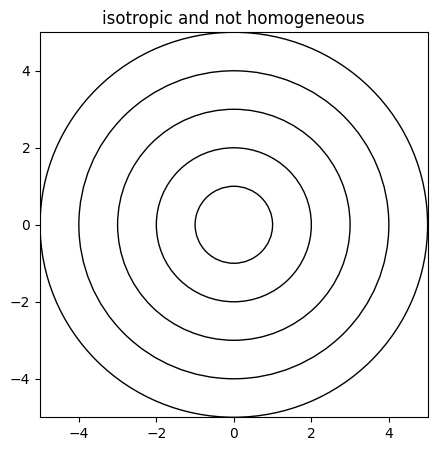

In [58]:
#circles of different r and same origin
circle1 = plt.Circle((0, 0), 1, color='k', fill=False)
circle2 = plt.Circle((0, 0), 2, color='k', fill=False)
circle3 = plt.Circle((0, 0), 3, color='k', fill=False)
circle4 = plt.Circle((0, 0), 4, color='k', fill=False)
circle5 = plt.Circle((0, 0), 5, color='k', fill=False)

#plot
fig, ax = plt.subplots(figsize=(5,5))

ax.set_xlim((-5, 5))
ax.set_ylim((-5, 5))
ax.add_patch(circle1)
ax.add_patch(circle2)
ax.add_patch(circle3)
ax.add_patch(circle4)
ax.add_patch(circle5)
plt.title("isotropic and not homogeneous")
plt.show()

**Binned Planck Power Spectra**

In [59]:
filename = 'COM_CompMap_CMB-smica_2048_R1.20.fits' #CMB map SMICA
m = hp.read_map(filename)
mask_path = 'COM_Mask_CMB-common-Mask-Int_2048_R3.00.fits' #Common mask
cmb_binned_spectrum = np.loadtxt('COM_PowerSpect_CMB-TT-binned_R3.01.txt') #Binned CMB spectrum

clT = hp.sphtfunc.anafast(m) #create power spectrum from SMICA map

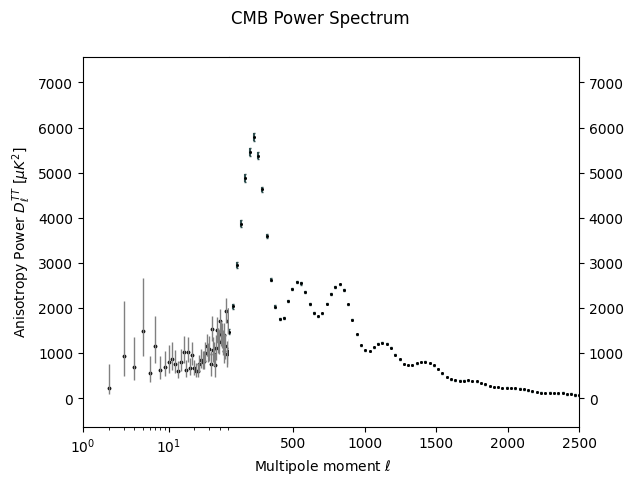

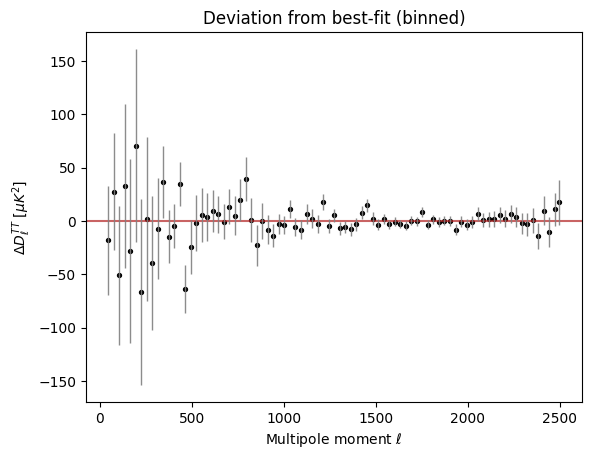

In [60]:
#loading planck temperature anisotropy power spectra, binned and unbinned
#http://pla.esac.esa.int/pla/#cosmology
data = np.loadtxt("COM_PowerSpect_CMB-TT-full_R3.01.txt") #only used for low-ell 
data2 = np.loadtxt("COM_PowerSpect_CMB-TT-binned_R3.01.txt")

#full spectrum
x = data[:,0]
y = data[:,1]
err = [data[:,2], data[:,3]]

#binned spectrum
x2 = data2[:,0]
y2 = data2[:,1]
err2 = [data2[:,2], data2[:,3]]
best_fit = data2[:,4]
difference = best_fit - y2
zeros = np.zeros(len(x2))

#plots
fig, axMain = plt.subplots()
fig.suptitle('CMB Power Spectrum ')
fig.text(0.5, 0.02, 'Multipole moment $\ell$', ha='center')

#error bars
lines={'linestyle': 'None'}
plt.rc('lines', **lines)
pl.errorbar(x,y, yerr=err, linewidth=1, color = 'gray')

#scatter plot with error bars up to ell=50
axMain.scatter(x, y, marker = 'o', s=3, color = 'k')
axMain.set_xscale('log')
axMain.set_xlim((1, 51))
axMain.spines['right'].set_visible(False)
axMain.set_ylabel('Anisotropy Power $D_\ell^{TT} \ [\mu K^2]$')

#binned data set for ell > 50
divider = make_axes_locatable(axMain)
axLin = divider.append_axes("right", size=3.5, pad=0, sharey=axMain)
axLin.scatter(x2, y2, marker = 'o', s=1, color = 'k')
axLin.errorbar(x2, y2, yerr=err2, ecolor='darkslategray', capsize=1, capthick=1, linestyle='None', marker='o', markersize=1, color='k')
axLin.set_xscale('linear')
axLin.set_xlim((51, 2500))
axLin.spines['left'].set_visible(False)
axLin.yaxis.set_ticks_position('right')

plt.show()

#deviation from LCDM best-fit
plt.axhline(y=0, color='firebrick', linestyle='-', alpha = 0.7)
pl.errorbar(x2,difference, yerr=err2, ecolor='gray', linewidth=1, alpha = 0.9)
plt.scatter(x2, difference, s = 8, color = 'k')
lines={'linestyle': 'None'}
plt.rc('lines', **lines)
plt.xlabel('Multipole moment $\ell$')
plt.ylabel('$\Delta D_\ell^{TT} \ [\mu K^2]$')
plt.title('Deviation from best-fit (binned)')
plt.show()

**Planck Maps**

The map covers 77.9% of the sky


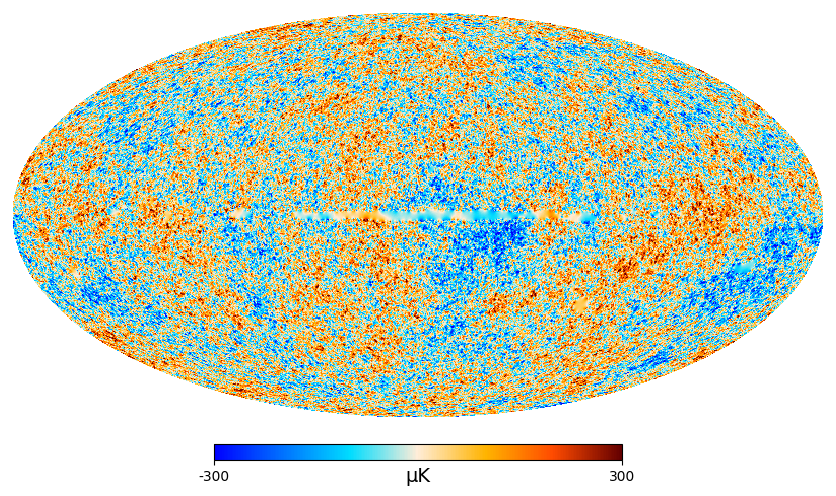

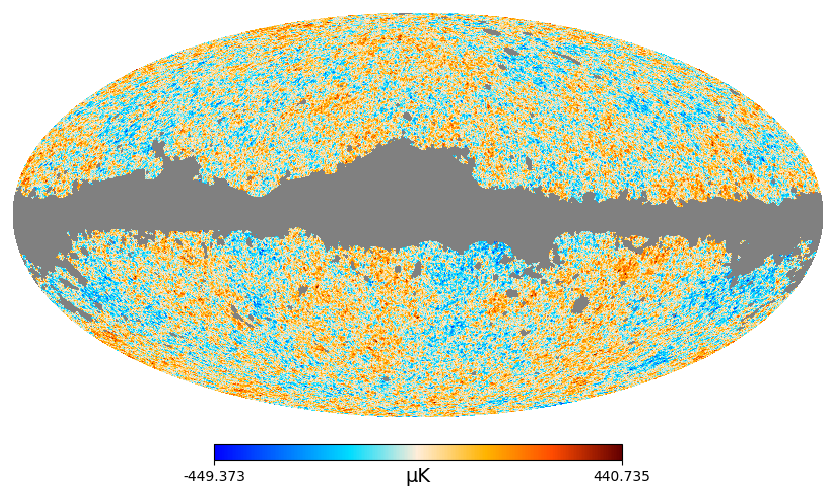

In [61]:
cmb_map = hp.read_map(filename)

hp.mollview(cmb_map, min=-300, max=300, unit="µK", title = '', cmap=cmap)
title="CMB temperature map"

#apply mask
mask = hp.read_map(mask_path)
map_masked = hp.ma(cmb_map)
map_masked.mask = np.logical_not(mask)

hp.mollview(map_masked, unit="µK", title = '', cmap=cmap)
title="CMB map with 2018 Component Separation Common mask"

#compute sky faction (non-masked fraction)
sky_fraction = len(map_masked.compressed()) / len(map_masked)
print(f"The map covers {sky_fraction:.1%} of the sky")